In [1]:
#!pip install mglearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import mglearn

In [3]:
# 경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore') # action = 'default' 경고메시지 표시

# 데이터셋 로딩

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

## Iris dataset 탐색

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
type(iris['data'])

numpy.ndarray

In [11]:
iris['data'].shape

(150, 4)

In [12]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['species'] = iris.target

In [14]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [15]:
# unique() : 중복을 제거하고 고유값만 추출
# value_counts() : 개별 요소의 건수를 반환하는 함수
df.species.unique()

array([0, 1, 2])

In [16]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df['species'][:50] = 'setosa'

In [22]:
df['species'][50:100] = 'versicolor'

In [24]:
df['species'][100:] = 'virginica'

## 훈련셋과 테스트셋 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

In [26]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 분류 알고리즘 : 의사결정트리(DecisionTreeClassifier)
    - 분류와 회귀에 사용되는 지도학습 알고리즘
    - 데이터 특성으로 부터 추론된 결정규칙을 통해 값을 예측
    - if-then-else 결정 규칙을 통해 데이터 학습
    - 트리의 깊이가 깊을수록 복잡한 모델이 된다.
    - 결정트리의 장점
        - 이해와 해석이 쉽다.
        - 시각화가 용이하다.
        - 많은 데이터의 전처리가 필요하지 않다.
        - 수치형과 범주형 데이터 모두를 다룰 수 있다.

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 121)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

### 트리 구조를 시각화하는 패키지 graphviz

In [28]:
import graphviz

In [29]:
from sklearn.tree import export_graphviz

# export_graphviz(모델객체, 출력파일명, 결정트리클래스명칭, 결정트리피쳐명칭)
export_graphviz(dtree, out_file='tree.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity=True, filled=True)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

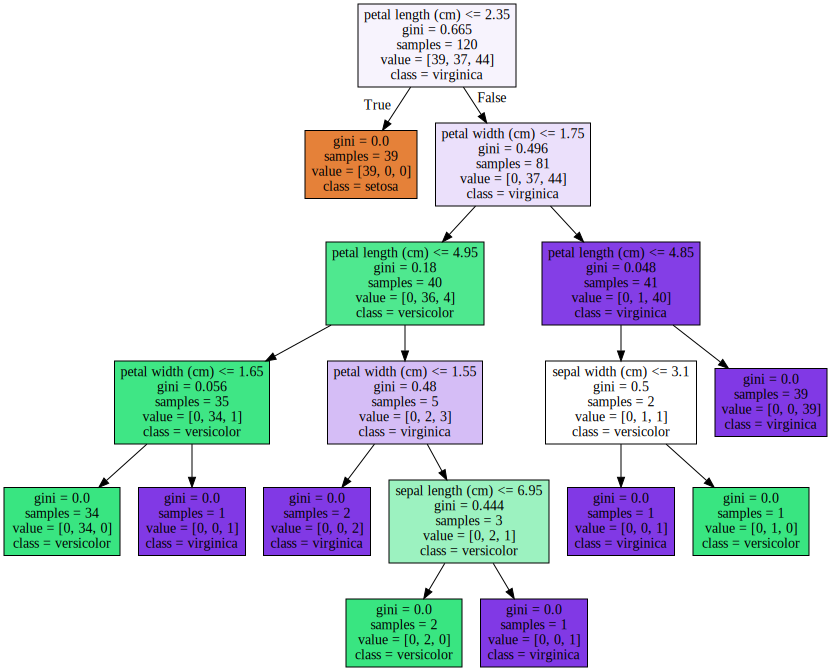

In [30]:
# open(filename, mode)
# mode : r(default), w, a
with open('tree.dot') as f:
    dot_graph = f.read()
    
src = graphviz.Source(dot_graph)
src

In [31]:
# 결정트리를 pdf 파일로 생성 : Source.gv, Source.gv.pdf 두개의 파일이 생성된다.
src.view()

'Source.gv.pdf'

In [32]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

1.0
1.0


## DecisionTree의 중요 하이퍼파라미터 조정

In [38]:
model = DecisionTreeClassifier(min_samples_split=4,random_state = 121)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=121)

In [39]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


## feature별 결정 트리 알고리즘의 중요도

In [40]:
model.feature_importances_

array([0.        , 0.        , 0.56028618, 0.43971382])

### feature 별 중요도 값 매칭

In [43]:
for name, value in zip(iris.feature_names, model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.560
petal width (cm) : 0.440


### feature 별 중요도 시각화

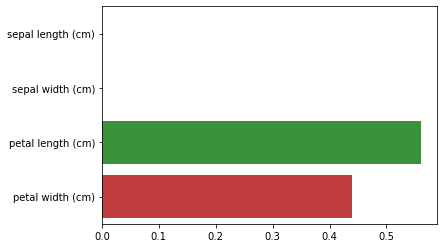

In [44]:
import seaborn as sns
sns.barplot(model.feature_importances_, iris.feature_names)
plt.show()

## 가지치기(Prunning)
1. Tree Prinning : 의사결정 트리 모델의 과적함(Overfitting)을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
2. 가지치기 방법
    - cross-validation
    - independen validation set
3. Prunning Logic
    - 가지치기 과정에서는 트리 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대깊이를 제한하고, leaf node의 최대 개수를 제한한다.
    - 노드를 분할시키기 위해 필요한 '최소한의 데이터 개수'를 지정한다.

In [45]:
model = DecisionTreeClassifier(max_depth = 3,random_state = 121)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [46]:
model = DecisionTreeClassifier(max_depth = 3,random_state = 121, min_samples_leaf = 6)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9583333333333334
0.9666666666666667


### 교차검증

In [47]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train)
scores

{'fit_time': array([0.0009973 , 0.00099683, 0.        , 0.0009973 , 0.00099778]),
 'score_time': array([0.        , 0.        , 0.00099754, 0.        , 0.        ]),
 'test_score': array([0.95833333, 0.91666667, 1.        , 0.95833333, 0.91666667])}

In [48]:
np.mean(scores['test_score'])

0.95

In [49]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(model, X_train, y_train, cv=StratifiedKFold())
np.mean(scores['test_score'])

0.95

In [50]:
scores

{'fit_time': array([0.00199461, 0.        , 0.0009973 , 0.00099778, 0.0009973 ]),
 'score_time': array([0.        , 0.00099635, 0.        , 0.        , 0.        ]),
 'test_score': array([0.95833333, 0.91666667, 1.        , 0.95833333, 0.91666667])}

### 그리드 서치(Grid Search)
- 결정 트리의 하이퍼파라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트셋을 사용하지 않고 교차 검증을 통해서 좋은 모델을 고르면 된다.

In [52]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 2022)

params = {
    'max_depth':[2, 3, 4, 5, 6, None],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [55]:
model = gs.best_estimator_
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [56]:
# 그리드 서치를 통해 찾은 최적의 매개변수
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [57]:
print(gs.best_score_)

0.9499999999999998


In [60]:
# 최상의 교차검증 점수
np.max(gs.cv_results_['mean_test_score'])

0.9499999999999998

In [64]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 2022,
                               min_samples_leaf = 1, min_samples_split = 2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667
